# `prep_for_imshow`
This function returns a dictionary that can be passed to ``matplotlib``'s ``imshow`` function, with all the necessary keyword arguments holding values to make the output look nice.

In [1]:
import matplotlib.pyplot as plt
import porespy as ps
import numpy as np
from edt import edt
from copy import copy
ps.visualization.set_mpl_style()

In [2]:
import inspect
inspect.signature(ps.visualization.prep_for_imshow)

<Signature (im, mask=None, axis=0, slice=None)>

In [3]:
im = ps.generators.blobs([50, 50, 50], porosity=0.6)
dt = edt(im)

## `im`
The `im` is usually greyscale values, but boolean also works.

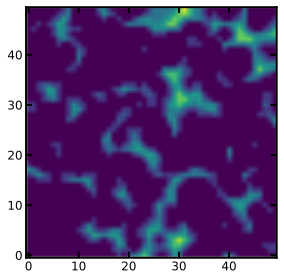

In [4]:
kw = ps.visualization.prep_for_imshow(im=dt, mask=im)
plt.imshow(**kw);

The returned `dict` is passable to `imshow` as keyword arguments, with all the useful values set

In [5]:
print(kw.keys())

dict_keys(['X', 'vmin', 'vmax', 'interpolation', 'origin'])


* `X` is the array to show.  The ``im`` was 3D, but the function extracts a 2D slice which is necessary for ``imshow``. 
* `vmin` and `vmax` are minimum and maximum values in ``im``, while any  negative and positive infinities are set to ``vmin - 1`` and ``vmax - 1`` respectively. You can adjust adjust a colormap to show suitable colors for over and under values.
* `interpolation` is set to `none` which prevents artifacts, especially in boolean images.
* `origin` is set to `lower` so that [0, 0] is in the bottom-left where it belongs.

We can show the solid phase as grey, and also use the ``plasma`` colormap:

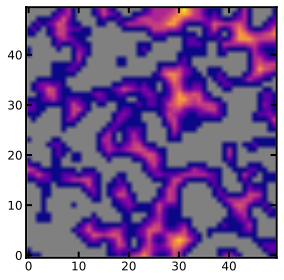

In [6]:
kw = ps.visualization.prep_for_imshow(im=dt, mask=im)
cmap = copy(plt.cm.plasma)
cmap.set_under('grey')
plt.imshow(**kw, cmap=cmap);

## `mask`
The mask is a boolean array indicating the voxels of interest when computing ``vmin`` and ``vmax``. This would typically be the image of the pore phase, but could be something more creative:

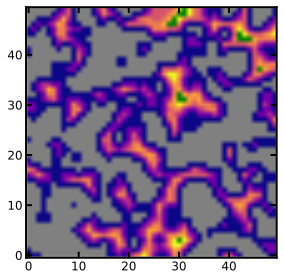

In [7]:
mask = im * (dt < 3)
kw = ps.visualization.prep_for_imshow(im=dt, mask=mask)
cmap = copy(plt.cm.plasma)
cmap.set_under('grey')
cmap.set_over('green')
plt.imshow(**kw, cmap=cmap);

## `axis`
The direction normal to which the slice should be taken.  The default is 0, which means a ``y-z`` slice looking in the ``x`` direction. 

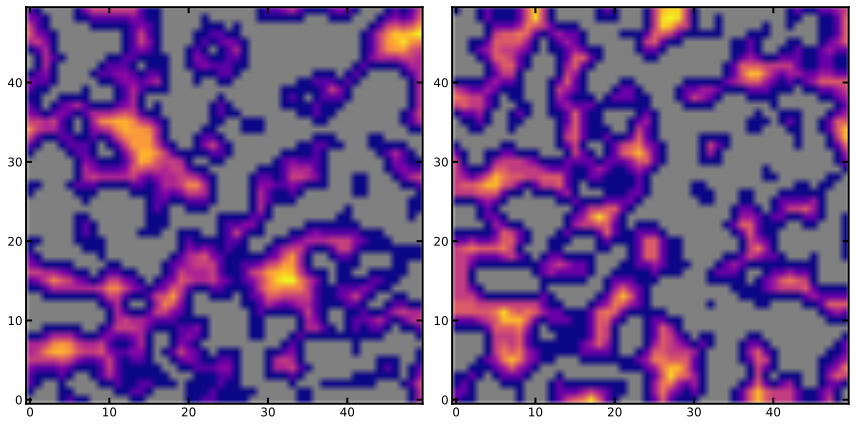

In [8]:
kw1 = ps.visualization.prep_for_imshow(im=dt, mask=im, axis=1)
kw2 = ps.visualization.prep_for_imshow(im=dt, mask=im, axis=2)

cmap = copy(plt.cm.plasma)
cmap.set_under('grey')
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(**kw1, cmap=cmap)
ax[1].imshow(**kw2, cmap=cmap);

## `slice`
The postion along ``axis`` where the 2D section should be taken from.  If not provided (and the image is 3D) then a slice is taken from the midpoint of the given ``axis``.

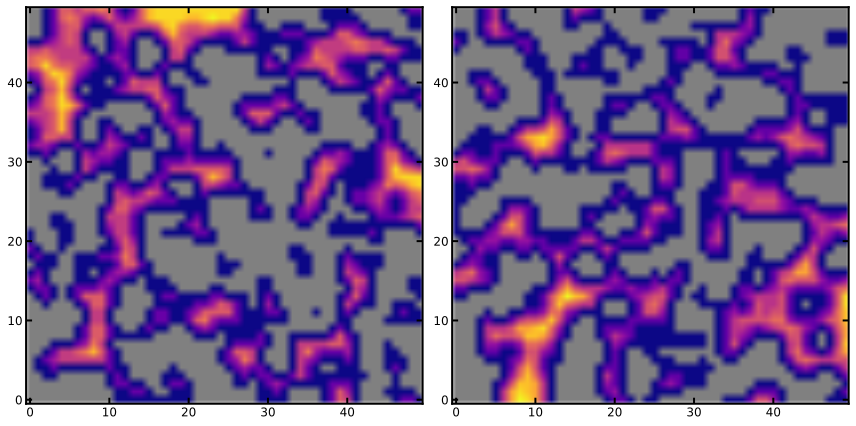

In [9]:
kw1 = ps.visualization.prep_for_imshow(im=dt, mask=im, slice=10)
kw2 = ps.visualization.prep_for_imshow(im=dt, mask=im, slice=20)

cmap = copy(plt.cm.plasma)
cmap.set_under('grey')
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].imshow(**kw1, cmap=cmap)
ax[1].imshow(**kw2, cmap=cmap);